Training Data Set

In [469]:
from sklearn.datasets import load_digits 
import numpy as np
from matplotlib import pyplot as plt
import math
images, labels = load_digits(2, return_X_y=True)
# Labeled training set 
training_images = images[:300] 
training_labels = labels[:300]
# Labeled test set 
test_images = images[300:] 
test_labels = labels[300:]

k-NN Classification Using 2-D Features

1.

In [470]:
mean_vec = (np.sum(training_images.T,axis=1))/(300)

In [471]:
mean_mat = np.tile(mean_vec.reshape(64,1),[1,300])

In [472]:
X = training_images.T - mean_mat

In [473]:
U, s, Vh = np.linalg.svd(X)

In [474]:
Xn = U[:,0:2].T@X

In [475]:
v = ['r']*300
i = 0;
for w in training_labels:
    if(w == 0):
        v[i] = 'r'
    if(w == 1):
        v[i] = 'g'
    i = i + 1

Graph below of Training Set.  Red is '0' and Green is '1'

Text(0.5,1,'PCA 2-D of Training Set')

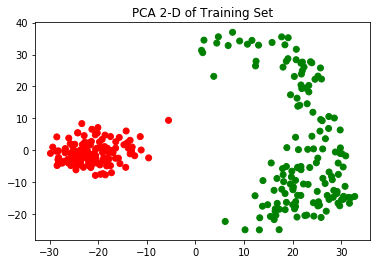

In [476]:
plt.scatter(Xn.T[:,0],Xn.T[:,1],c=v)
plt.title("PCA 2-D of Training Set")

2.

In [477]:
tmean_vec = (np.sum(test_images.T,axis=1))/(60)

In [478]:
tmean_mat = np.tile(tmean_vec.reshape(64,1),[1,60])

In [479]:
tX = test_images.T - tmean_mat

In [480]:
tXn = U[:,0:2].T@tX

In [481]:
u = [0]*60
z = 0
for e in u:
    o = [0]*300
    i = 0;
    for w in Xn.T:
        o[i] = np.linalg.norm(tXn.T[z]-w)
        i = i + 1
    os = sorted(o)
    p = training_labels[o.index(os[0])]+training_labels[o.index(os[1])]+training_labels[o.index(os[2])]+training_labels[o.index(os[3])]+training_labels[o.index(os[4])]
    if(p>=3):
        u[z] = 1
    else:
        u[z] = 0
    z = z + 1


In [482]:
h = ['r']*300
g = 0;
for w in u:
    if(w == 0):
        h[g] = 'black'
    if(w == 1):
        h[g] = 'blue'
    g = g + 1

In [483]:
test_labels - u

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

There is no error since the test labels match the kNN algorithm as seen above.
Below is the scatter of test datas where black is '0' and blue is '1' based on kNN.(Compared with original scatter)

Text(0.5,1,'PCA 2-D of Test Set')

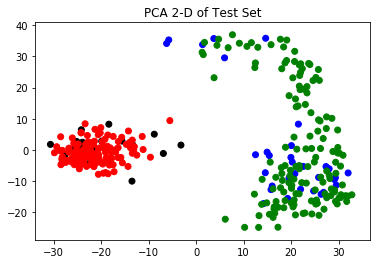

In [484]:
plt.scatter(tXn.T[:,0],tXn.T[:,1],c=h)
plt.scatter(Xn.T[:,0],Xn.T[:,1],c=v)
plt.title("PCA 2-D of Test Set")

So the PCA with errors will be a scatter with all blues

Text(0.5,1,'PCA 2-D of Test Labels Error with Training Labels')

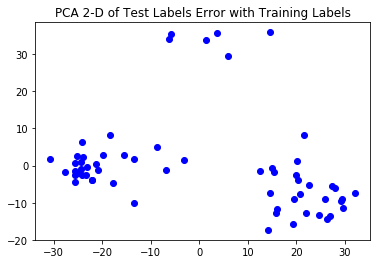

In [485]:
plt.scatter(tXn.T[:,0],tXn.T[:,1],c='blue')
plt.title("PCA 2-D of Test Labels Error with Training Labels")

3.

Given the fact that there is no error given with the kNN(given by test_labels - u), we can say that the average classification error is 0.  (There is no point where y(i) != y)

k-NN Classification Using Higher-Dimensional Features

1.

In [486]:
k = 0
total = 0
while (np.linalg.norm(X)**2)*0.95>=total:
    total = total + s[k]**2
    k = k + 1

In [487]:
k

19

In [488]:
tXnn = U[:,0:19].T@tX

In [489]:
Xnn = U[:,0:19].T@X

In [490]:
storearr = [0]*5
for q in range(5):
    f = 2*q+1
    u = [0]*60
    z = 0
    for e in u:
        o = [0]*300
        i = 0;
        for w in Xnn.T:
            o[i] = np.linalg.norm(tXnn.T[z]-w)
            i = i + 1
        os = sorted(o)
        nsum = 0;
        for m in range(f+1):
            nsum = training_labels[o.index(os[m])] + nsum
        if(nsum>=math.ceil(f/2)):
            u[z] = 1
        else: 
            u[z] = 0
        z = z + 1
    storearr[q] = sum(np.absolute(test_labels-u))


In [491]:
storearr

[0, 0, 0, 0, 0]

Text(0.5,1,'Error based on K')

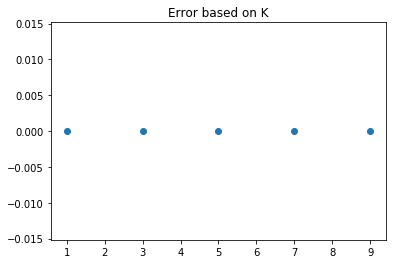

In [492]:
plt.scatter([1,3,5,7,9],storearr)
plt.title("Error based on K")

2.

Since the errors based on K all equal 0, the best choice would be K = 1 as it would require less computational time to compute and still give you the same result.